# Experiments with kernel machines

In this notebook we will use simple two-dimensional data sets to illustrate the behavior of the support vector machine and the Perceptron, when used with quadratic and RBF kernels.

## 1. Basic training procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain two-dimensional data files, `data1.txt` through `data5.txt`. These files contain one data point per line, along with a label (either -1 or 1), like:
* `3 8 -1` (meaning that point `x=(3,8)` has label `y=-1`)

The next procedure, **learn_and_display_SVM**, loads one of these data sets, invokes `sklearn.SVC` to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:
* `learn_and_display_SVM(datafile, kernel_type, C_value, s_value)`

where
* `datafile` is one of `'data1.txt'` through `'data5.txt'` (or another file in the same format)
* `kernel_type` is either `'quadratic'` or `'rbf'`
* `C_value` is the setting of the soft-margin parameter `C` (default: 1.0)
* `s_value` (for the RBF kernel) is the scaling parameter `s` (default: 1.0)

In [2]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro') ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10) ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^') ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10) ## x[bool1*bool2] means x[bool1 & bool2]
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

## 2. Experiments with the quadratic kernel

Let's try out SVM on some examples, starting with the quadratic kernel.

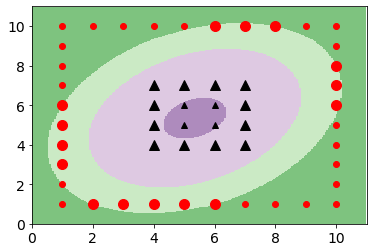

In [3]:
learn_and_display_SVM('data1.txt', 'quadratic', 1.0)

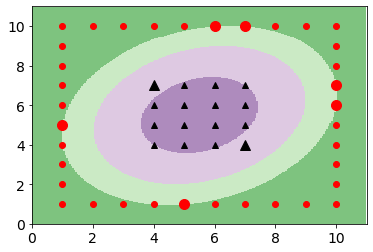

In [4]:
learn_and_display_SVM('data1.txt', 'quadratic', 10.0)

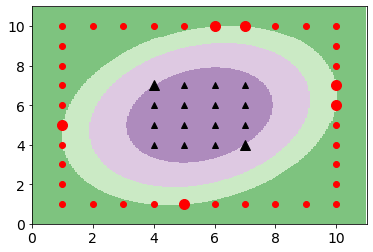

In [5]:
learn_and_display_SVM('data1.txt', 'quadratic', 100) # Large C = the price of a slack is expensive ~= hard-margin SVM

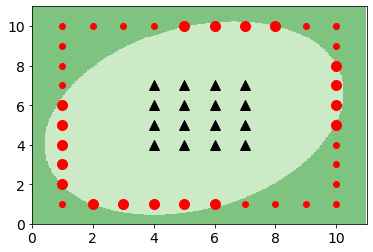

In [6]:
learn_and_display_SVM('data1.txt', 'quadratic', 0.01) # Small C = the price of a slack is cheap.

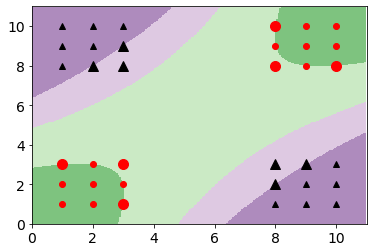

In [7]:
learn_and_display_SVM('data2.txt', 'quadratic', 1.0)

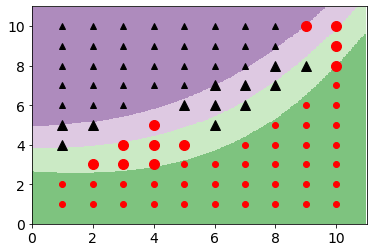

In [8]:
learn_and_display_SVM('data3.txt', 'quadratic', 1.0)

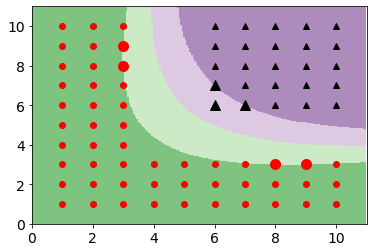

In [9]:
learn_and_display_SVM('data4.txt', 'quadratic', 1.0)

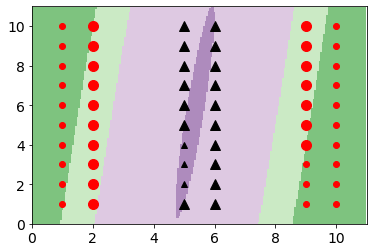

In [10]:
learn_and_display_SVM('data5.txt', 'quadratic', 1.0)

Also try `data2.txt` through `data5.txt`. Also try changing the value of `C` (the third parameter) to see how that affects the boundary and margin.

## 3. Experiments with the RBF kernel

Now experiment with the RBF kernel, on the same five data sets. This time there are two parameters to play with: `C` and `sigma`.

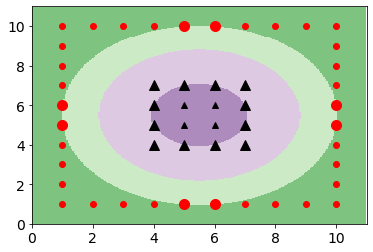

In [11]:
learn_and_display_SVM('data1.txt', 'rbf', 10.0, 10.0)

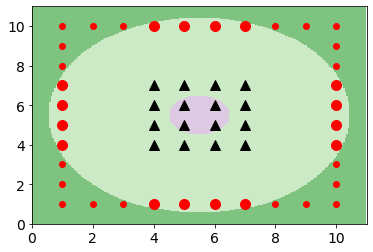

In [12]:
learn_and_display_SVM('data1.txt', 'rbf', 1, 10.0)

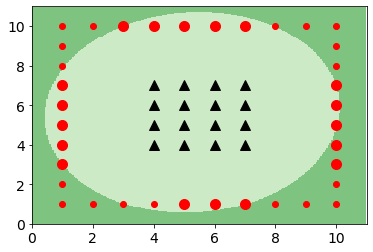

In [13]:
learn_and_display_SVM('data1.txt', 'rbf', 1, 100)

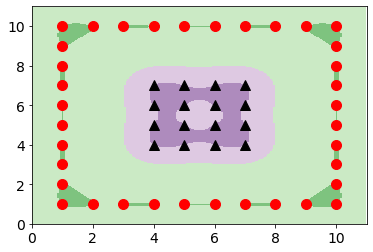

In [14]:
learn_and_display_SVM('data1.txt', 'rbf', 10, 1)

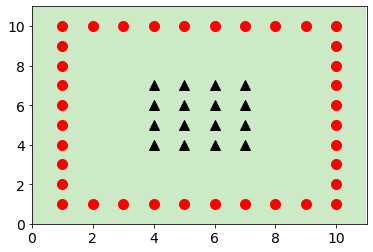

In [15]:
learn_and_display_SVM('data1.txt', 'rbf', 10, 0.01)  #all predictions are the same. k(x,z) -> 0

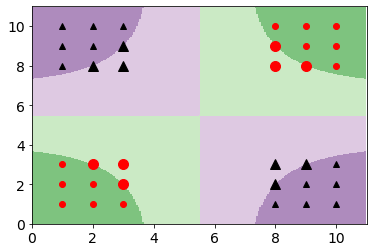

In [16]:
learn_and_display_SVM('data2.txt', 'rbf', 10.0, 10.0) 

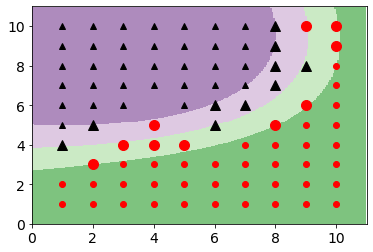

In [17]:
learn_and_display_SVM('data3.txt', 'rbf', 10.0, 10.0) 

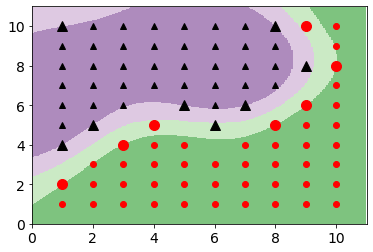

In [18]:
learn_and_display_SVM('data3.txt', 'rbf', 10.0, 4.0) 

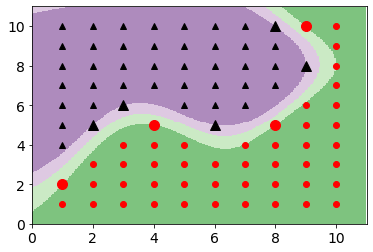

In [19]:
learn_and_display_SVM('data3.txt', 'rbf', 1000.0, 4.0) 

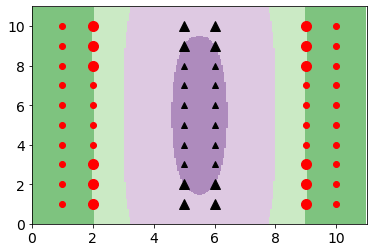

In [20]:
learn_and_display_SVM('data5.txt', 'rbf', 10.0, 10.0) 

## 4. The kernel Perceptron

<font color="magenta">**For you to do:**</font> Implement the kernel Perceptron algorithm as specified in lecture. Your algorithm should allow both the quadratic and RBF kernel, and should follow roughly the same signature as the SVM routine above:
* `learn_and_display_Perceptron(datafile, kernel_type, s_value)`

Recall that the Perceptron algorithm does not always converge; you will need to explicitly check for this.

In [21]:
def kernel_function(x,z,kernel_type,s_value):
    
    if kernel_type == 'quadratic':
        kernel = (1+np.dot(x,z))**2
    elif kernel_type == 'rbf':
        kernel = np.exp(-(np.sum((x-z)**2,axis=1))/(s_value**2))
    else: 
        print("kernel_type must be either 'quadratic' or 'rbf'")
    
    return kernel

In [22]:
def evaluate_classifier(alpha,b,trainx,trainy,x,kernel_type,s_value):
    if (np.sum(alpha*trainy*kernel_function(trainx,x,kernel_type,s_value))+b) > 0:
        return 1
    if (np.sum(alpha*trainy*kernel_function(trainx,x,kernel_type,s_value))+b) <= 0:
        return -1
    return 0

In [23]:
def training_parameters(trainx,trainy,kernel_type,s_value):
    max_iter=10000
    alpha = np.zeros(len(trainy))
    b = 0
    converge = True
    done = False
    iteration=0
    np.random.seed(None)
    while not(done):
        done = True
        I=np.random.permutation(len(trainy))
        for j in range(len(I)):
            if (evaluate_classifier(alpha,b,trainx,trainy,trainx[j,:],kernel_type,s_value) != trainy[j]):
                alpha[j]=alpha[j]+1
                b = b + trainy[j]
                done = False
        iteration = iteration + 1  
        if iteration > max_iter:
            done = True
            converge = False
            
    if converge:
        print("Perceptron converged in %i iterations" %iteration)
    else:
        print("Perceptron didn't converged in %i iterations" %max_iter)
    return alpha, b, iteration

In [24]:
def learn_and_display_Perceptron(datafile, kernel_type='quadratic', s_value=1.0):
    
    data = np.loadtxt(datafile)
    trainx=data[:,0:2]
    trainy=data[:,2]
    alpha, b, iteration = training_parameters(trainx,trainy,kernel_type,s_value)

    sv = np.zeros(len(trainy),dtype=bool)
    sv[(alpha>0)] = True
    notsv = np.logical_not(sv)
    
    # Determine the x1- and x2- limits of the plot
    x1min = min(trainx[:,0]) - 1
    x1max = max(trainx[:,0]) + 1
    x2min = min(trainx[:,1]) - 1
    x2max = max(trainx[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(trainx[(trainy==1)*notsv,0], trainx[(trainy==1)*notsv,1], 'ro') ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(trainx[(trainy==1)*sv,0], trainx[(trainy==1)*sv,1], 'ro', markersize=10) ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(trainx[(trainy==-1)*notsv,0], trainx[(trainy==-1)*notsv,1], 'k^') ## x[bool1*bool2] means x[bool1 & bool2]
    plt.plot(trainx[(trainy==-1)*sv,0], trainx[(trainy==-1)*sv,1], 'k^', markersize=10) ## x[bool1*bool2] means x[bool1 & bool2]
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    

    Z=np.zeros((len(grid),1))
    for n_grid in range(len(grid)):
        grid_indiv = grid[n_grid,:]
        Zgrid = np.sum(alpha*trainy*kernel_function(trainx,grid_indiv,kernel_type,s_value))+b
        Z[n_grid]=Zgrid
        # Quantize the values
        Zgrid = min(Zgrid,1.0)
        Zgrid = max(Zgrid,-1.0)
        if (Zgrid > 0.0) and (Zgrid < 1.0):
            Zgrid = 0.5
        if (Zgrid < 0.0) and (Zgrid > -1.0):
            Zgrid = -0.5     
        Z[n_grid,0]=Zgrid

    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()
  

Perceptron converged in 1916 iterations


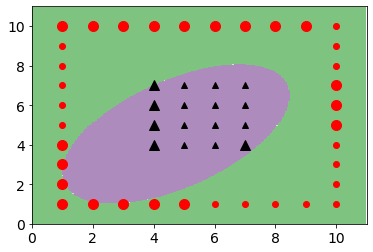

In [25]:
learn_and_display_Perceptron("data1.txt",'quadratic',4)

Perceptron converged in 7 iterations


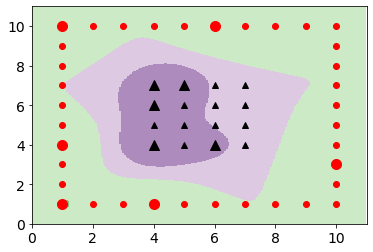

In [26]:
learn_and_display_Perceptron("data1.txt",'rbf',1.4)

Perceptron converged in 3 iterations


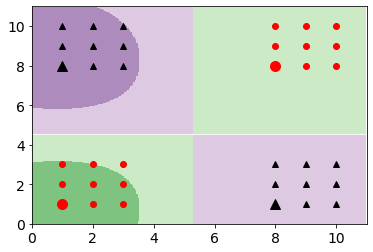

In [27]:
learn_and_display_Perceptron("data2.txt",'rbf',4)

Perceptron converged in 26 iterations


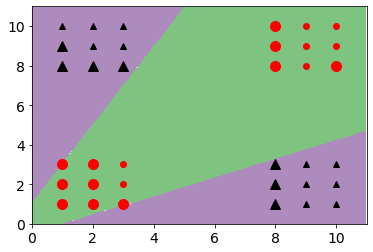

In [28]:
learn_and_display_Perceptron("data2.txt",'quadratic')

Perceptron converged in 4 iterations


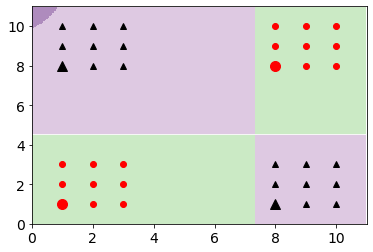

In [29]:
learn_and_display_Perceptron("data2.txt",'rbf',9.9)

Perceptron converged in 12 iterations


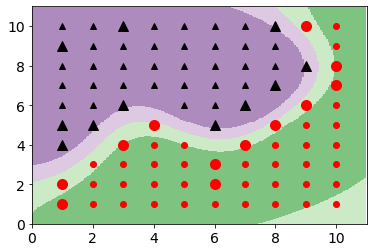

In [30]:
learn_and_display_Perceptron("data3.txt",'rbf',3)

Perceptron didn't converged in 10000 iterations


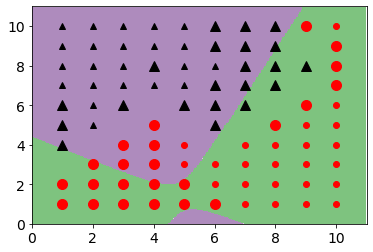

In [31]:
learn_and_display_Perceptron("data3.txt",'quadratic')

Perceptron converged in 9 iterations


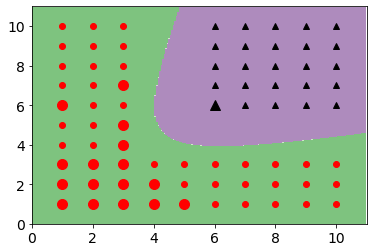

In [32]:
learn_and_display_Perceptron("data4.txt",'quadratic')

Perceptron converged in 7 iterations


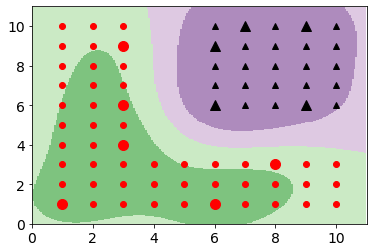

In [33]:
learn_and_display_Perceptron("data4.txt",'rbf',2.7)

Perceptron converged in 3350 iterations


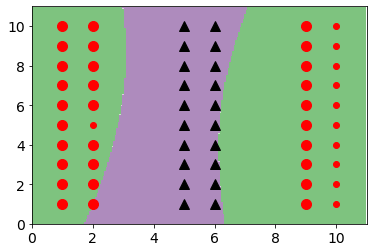

In [34]:
learn_and_display_Perceptron("data5.txt",'quadratic')

Perceptron converged in 9 iterations


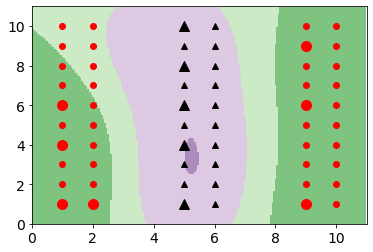

In [35]:
learn_and_display_Perceptron("data5.txt",'rbf',4)

<font color="magenta">Experiment with your routine, on the same five data sets.</font>

Perceptron converged in 8 iterations


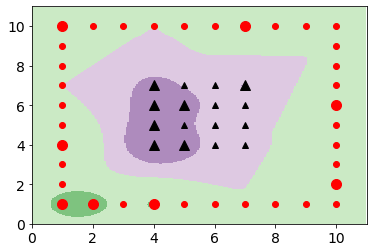

In [36]:
learn_and_display_Perceptron("data1.txt",'rbf',1)

Perceptron converged in 3 iterations


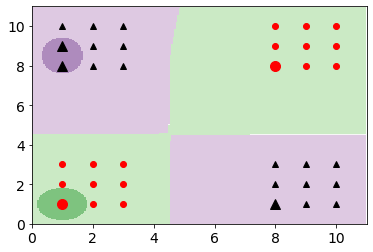

In [37]:
learn_and_display_Perceptron("data2.txt",'rbf',1)

Perceptron converged in 8 iterations


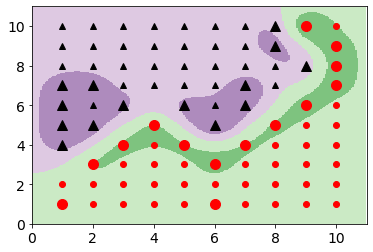

In [38]:
learn_and_display_Perceptron("data3.txt",'rbf',1)

Perceptron converged in 5 iterations


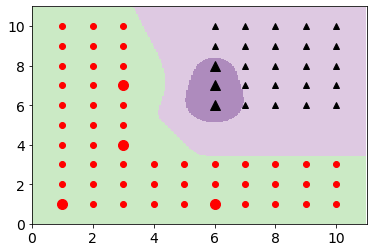

In [39]:
learn_and_display_Perceptron("data4.txt",'rbf',1)

Perceptron converged in 3 iterations


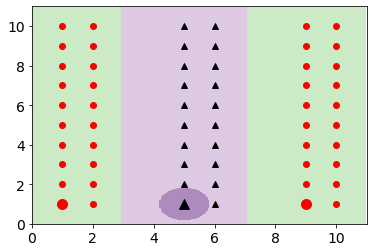

In [40]:
learn_and_display_Perceptron("data5.txt",'rbf',1)